# AssurPrime : Saurez-vous prédire la prime d'assurance ?

<p align="center">
  <img src="https://challengedata.ens.fr/logo/public/CA_assurances_RVB_sans-raison-d%C3%AAtre_%C3%A9v%C3%A9nementiel_Mg5WVL6.png" width="350" title="Crédit Agricole Assurances">
  <p align="center">
    <a href="https://colab.research.google.com/github/auduvignac/challengedata_ens_AssurPrime/blob/main/notebooks/exploration/assurprim_modeling_workflow.ipynb" target="_blank">
      <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Ouvrir dans Google Colab"/>
    </a>
  </p>
</p>

# Présentation complète du projet

## Contexte

Crédit Agricole Assurances est une filiale du Groupe Crédit Agricole dédiée à l’assurance, faisant de celui-ci un acteur multi-expert de la bancassurance et le 1er bancassureur en Europe.
Crédit Agricole Assurances regroupe plusieurs entités, dont Predica et Pacifica, qui proposent une large gamme d’assurances aux particuliers, aux exploitants agricoles, aux professionnels et aux entreprises. Crédit Agricole Assurances s’engage à offrir des solutions innovantes et adaptées aux besoins des clients, tout en favorisant le développement durable et la responsabilité sociale.
Au sein de l’Académie Data Science du groupe, l’objectif est de participer activement à la montée en compétences des collaborateurs, de partager des connaissances et d’identifier de nouveaux usages.

## Objectif

Le contrat Multirisque Agricole, géré par Pacifica, est souscrit par les agriculteurs pour sécuriser leur exploitation. Il couvre l’activité professionnelle, les dommages aux bâtiments d’exploitation, le matériel stocké, ainsi que la protection financière et juridique. Ce contrat garantit à l’assuré une couverture efficace et durable, assurant ainsi la continuité de son activité en cas de sinistre, tant sur le plan matériel que financier.

Actuellement, le risque d’incendie constitue une part majeure de la charge sinistre du contrat Multirisque Agricole, ce qui en fait un enjeu clef à modéliser avec précision.

L’objectif est d’identifier le meilleur modèle pour prédire la prime pure incendie, en utilisant :
- Un modèle pour la Fréquence,
- Un modèle pour le Coût moyen.

La variable cible finale, la charge, est obtenue en multipliant la fréquence, le coût moyen, et le nombre d’années depuis la souscription du contrat (la variable `ANNEE_ASSURANCE`).


## Description des données

Un fichier supplémentaire est mis à disposition regroupant toutes les variables disponibles, accompagnées de leur description. Ce fichier inclut :

- **Les variables cibles** : `FREQ`, `CM`, et `CHARGE`
- **Données géographiques** : département, données météorologiques, etc.
- **Données spécifiques au contrat**, notamment :
    - L’activité de l’assuré (cultivateur, polyculteur, etc.)
    - Les indicateurs de souscription des garanties
    - Le nombre de bâtiments, de salariés, et de sinistres déclarés lors de la souscription
    - **Données de surface** : surfaces des bâtiments (élevage, exploitation, etc.), anonymisées en `surface1`, `surface2`, etc., pour garantir la confidentialité
    - **Données de capitaux** : capitaux assurés pour différentes options (vol, serres, etc.), anonymisés en `capital1`, `capital2`, etc.
    - **Données liées à la prévention** : présence d’équipements (extincteurs, structure en bois, etc.), anonymisées en `prev1`, `prev2`, etc.


## Description du *benchmark*

### Objectif du challenge

L’objectif de ce challenge est de comparer les performances des modèles développés dans le cadre de cette compétition avec celles d’un modèle de référence basé sur des **GLM (Generalized Linear Models)** classiques.

### Structure du benchmark

Le benchmark repose sur deux modèles **GLM** distincts :

- Fréquence des sinistres :
    - Distribution : *Loi de Poisson* ;
    - Fonction de lien : *Log*.

- Coût moyen d’un sinistre :
    - Distribution : *Tweedie* ;
    - Fonction de lien : *Log*.

### Évaluation

L’évaluation des modèles repose sur une métrique unique : **RMSE (Root Mean Square Error)**, définie par la formule suivante :

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

où :
- $y_i$ représente la valeur réelle ;
- $\hat{y}_i$ représente la valeur prédite ;
- $n$ est le nombre d’observations.

L’idée reste d’évaluer dans quelle mesure les approches proposées permettent de dépasser les performances des modèles standards tout en prenant en compte :

- La précision des prédictions ;
- Les aspects d’interprétabilité et d’efficacité ;
- Les contraintes métier associées.

# Résumé

Le but est de construire un pipeline de modélisation permettant d’estimer la **charge sinistre incendie**, via deux composantes principales :

- La **fréquence des sinistres** (`FREQ`)
- Le **coût moyen des sinistres** (`CM`)

La variable cible finale est définie comme : `CHARGE = FREQ × CM × ANNEE_ASSURANCE`.

## Données disponibles

- **Cibles** :
  - `FREQ`;
  - `CM`;
  - `CHARGE`.
- **Informations géographiques** :
  - département;
  - météo.
- **Descripteurs du contrat** :
  - activité assurée;
  - garanties souscrites;
  - nombre de bâtiments;
  - surface;
  - capitaux;
  - équipements de prévention.
- **Variables anonymisées** : certaines variables sensibles ont été anonymisées pour des raisons de confidentialité. Bien que leur signification exacte soit masquée, leur typologie (quantitative, binaire, etc.) permet d’en exploiter le contenu via des méthodes d’analyse statistique et de modélisation. Elles se présentent sous forme de groupes de variables thématiques telles que :
  - `surface1`, `surface2`, ... : indicateurs de **surfaces agricoles** (bâtiments d’élevage, stockage, exploitation, etc.)
  - `capital1`, `capital2`, ... : **capitaux assurés** pour différentes garanties optionnelles (ex. vol, serres, machines)
  - `prev1`, `prev2`, ... : **mesures de prévention** contre les incendies ou sinistres (présence d’extincteurs, structures en matériaux spécifiques, etc.)


## Modèle de référence (benchmark)

Un double modèle **GLM** sert de base comparative :

| Modèle        | Distribution | Fonction de lien |
|---------------|--------------|------------------|
| Fréquence     | Poisson      | Log              |
| Coût moyen    | Tweedie      | Log              |

Ces modèles sont évalués selon la **Root Mean Square Error (RMSE)** :$\sqrt{\frac{1}{n} \sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2}$, sur la variable finale `CHARGE`.

## Contenu du notebook

Ce notebook comprend les étapes suivantes :

1. **Exploration des données**
2. **Préparation des variables** (feature engineering, nettoyage, encodage)
3. **Modélisation fréquence & coût moyen**
4. **Évaluation des performances**
5. **Analyse des résidus et interprétation**

# Bibliothèques utilisées

Cette section regroupe l’installation et l’importation des bibliothèques nécessaires pour l’ensemble du pipeline : de l’analyse exploratoire à la modélisation, en passant par le prétraitement des données et l’évaluation des performances.

### Manipulation de données
- `pandas`, `numpy` : gestion et transformation de données tabulaires et numériques.

### Visualisation
- `matplotlib.pyplot`, `seaborn` : création de graphiques pour l’exploration visuelle des données et l’interprétation des résultats.

### Statistiques et tests
- `scipy.stats.chi2_contingency` : test d’indépendance du khi² sur des variables qualitatives.

### Machine Learning
- `scikit-learn` : 
  - Prétraitement : `SimpleImputer`, `StandardScaler`
  - Modélisation : régression logistique, Ridge, Random Forest, Gradient Boosting
  - Validation croisée, tuning et métriques : RMSE, F1-score, AUC, etc.
- `xgboost` : algorithmes de boosting performants via `XGBClassifier` et `XGBRegressor`.

### Encodage des variables catégorielles
- `category_encoders.CountEncoder` : encodage des modalités par fréquence d’apparition.

### Affichage dans le notebook
- `IPython.display.display` : affichage ciblé et lisible des DataFrames ou objets complexes.


In [3]:
!pip install -q category-encoders \
                matplotlib \
                numpy \
                pandas \
                scikit-learn \
                seaborn \
                xgboost

In [ ]:
# Standard library (ex. pathlib, math, os, sys)
from pathlib import Path

# Third-party libraries (ex. numpy, pandas, matplotlib, scikit-learn)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import CountEncoder
from IPython.display import HTML, display
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    mean_squared_error,
    roc_auc_score,
)
from sklearn.model_selection import (
    train_test_split,
)

# Chargement et aperçu des données

Chargement des fichiers de données d'entraînement à partir des sources distantes. Les fichiers comprennent :

- `X_train` : variables explicatives issues des contrats d’assurance ;
- `y_train` : variables cibles associées :
  - `FREQ` : fréquence des sinistres incendie ;
  - `CM` : coût moyen par sinistre ;
  - `CHARGE` : charge totale sinistre incendie (`CHARGE = FREQ × CM × ANNEE_ASSURANCE`).

Le chargement des fichiers repose sur une stratégie de *fallback* : les données sont d’abord recherchées en local (chemins absolus), et en cas d’absence, elles sont automatiquement téléchargées depuis des URLs distantes, puis conservées localement pour les exécutions futures.

In [5]:
# Définition des chemins locaux
local_x_path = Path("../../data/raw/x_train.csv").resolve()
local_y_path = Path("../../data/raw/y_train.csv").resolve()

# URLs distantes (GitHub)
X_train_url = (
    "https://media.githubusercontent.com/media/auduvignac/"
    "challengedata_ens_AssurPrime/refs/heads/main/data/raw/x_train.csv"
)
y_train_url = (
    "https://media.githubusercontent.com/media/auduvignac/"
    "challengedata_ens_AssurPrime/refs/heads/main/data/raw/y_train.csv"
)


def load_dataset(local_path, url, name):
    """
    Charge un fichier CSV depuis un chemin local, ou le télécharge depuis
    une URL si le fichier n'existe pas localement.

    Le fichier est ensuite sauvegardé localement pour les exécutions
    futures (fallback).

    Parameters
    ----------
    local_path : pathlib.Path
        Chemin vers le fichier local.
    url : str
        URL distante du fichier CSV.
    name : str
        Nom affiché lors du chargement (utilisé pour les logs).

    Returns
    -------
    pandas.DataFrame
        Le contenu du fichier CSV sous forme de DataFrame.
    """
    if local_path.exists():
        print(f"{name} chargé depuis : {local_path}")
        return pd.read_csv(local_path)
    else:
        print(f"{name} non trouvé localement, téléchargement depuis l'URL...")
        df = pd.read_csv(url)
        local_path.parent.mkdir(parents=True, exist_ok=True)
        df.to_csv(local_path, index=False)
        print(
            f"{name} téléchargé et enregistré localement dans : {local_path}"
        )
        return df


# Chargement des jeux de données
try:
    print("Chargement des données...")
    X_train = load_dataset(local_x_path, X_train_url, "X_train")
    y_train = load_dataset(local_y_path, y_train_url, "y_train")
    print("Données chargées avec succès.\n")

except Exception as e:
    print("Échec du chargement des données.")
    print("Vérifiez la validité des URL ou la connexion internet.")
    print(e)

Chargement des données...
X_train chargé depuis : /home/aurelien/workspace/challengedata_ens_AssurPrime/data/raw/x_train.csv


/tmp/ipykernel_70826/2097101940.py:40: DtypeWarning: Columns (16,17,29,30,31,126,128,129,132,133,135,138,371) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(local_path)


y_train chargé depuis : /home/aurelien/workspace/challengedata_ens_AssurPrime/data/raw/y_train.csv
Données chargées avec succès.



Une fois le chargement des données effectué, il convient tout d’abord de vérifier que `X_train` et `y_train` possèdent le même nombre de lignes. Un aperçu des premières lignes du jeu d’entraînement est ensuite présenté afin d’en examiner la structure et le contenu.

In [6]:
print(f"Dimensions de X_train : {X_train.shape}")
print(f"Dimensions de y_train : {y_train.shape}")

if len(X_train) == len(y_train):
    print("Les jeux de données disposent bien du même nombre d'observations.")
else:
    print(
        "Les jeux de données ne disposent pas du même nombre d'observations."
    )

Dimensions de X_train : (383610, 374)
Dimensions de y_train : (383610, 5)
Les jeux de données disposent bien du même nombre d'observations.


La correspondance en nombre d’observations entre `X_train` et `y_train` étant assurée, nous poursuivons avec une inspection des premières colonnes de `X_train`, afin d’identifier la nature et l’hétérogénéité des variables disponibles.

## Aperçu des variables explicatives (`X_train`)

Le jeu de données `X_train` contient les **variables explicatives** issues des contrats d’assurance souscrits dans le cadre du produit Multirisque Agricole.  
Chaque ligne correspond à **un contrat**, et chaque colonne décrit une caractéristique associée.

Ci-dessous, les premières lignes de `X_train` sont affichées pour donner un aperçu de la structure des données. disponibles.

In [7]:
# aperçu de X_train
print("Aperçu de X_train :")
display(X_train.head())

Aperçu de X_train :


,ID,ACTIVIT2,VOCATION,TYPERS,ANCIENNETE,ADOSS,CARACT1,CARACT2,CARACT3,INDEM1,...,NBJRR100_MMAX_A,NBJRR100_MSOM_A,RR_VOR_MM_A,RR_VOR_MMAX_A,RRAB_VOR_MM_A,RRAB_VOR_MMAX_A,ANNEE_ASSURANCE,ESPINSEE,AN_EXERC,ZONE
0,1,ACT1,VOC6,1,0,N,N,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,ANNEE5,3
1,2,ACT1,VOC6,1,0,N,N,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,ANNEE5,3
2,3,ACT1,VOC6,1,2,N,R,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,0.402740,NaN,ANNEE5,3
3,4,ACT1,VOC6,2,0,N,N,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,0.246575,NaN,ANNEE5,3
4,5,ACT1,VOC6,2,1,N,N,NaN,NaN,N,...,01. <= 0,01. <= 0,03. <= 102,03. <= 232,04. >= 25,02. <= 57,0.838356,NaN,ANNEE5,3


Les premières colonnes mettent en évidence la richesse du jeu de données :

- **Variables catégorielles** liées au contrat : `ACTIVIT2`, `VOCATION`, `TYPERS`, etc.
- **Caractéristiques techniques ou déclaratives** : `CARACT1`, `CARACT2`, etc.
- **Données météorologiques et historiques** : variables commençant par `NBJRR`, `RR_VOR`, `RRAB_VOR`, etc.
- **Variables numériques continues** comme `ANNEE_ASSURANCE`, indiquant l’ancienneté du contrat.

Certaines colonnes contiennent :

- Des **valeurs manquantes** qu’il faudra prendre en compte dans le cadre du prétraitement ;
- Des données **anonymisées ou encodées** (`surface1`, `capital1`, `prev1`, etc.) pour des raisons de confidentialité.

### Statistiques descriptives de `X_train`

Examinons les statistiques descriptives de `X_train` pour mieux comprendre la distribution des variables, identifier les valeurs manquantes et détecter les éventuelles anomalies.

Pour cela, une méthode `scrollable_describe` a été implémentée. Elle s’appuie sur la méthode `describe()` de `pandas` pour générer un résumé statistique des colonnes numériques du DataFrame, tout en encapsulant l’affichage dans un bloc défilant afin de mutualiser les appels et et assurer un lisibilité plus aisée.

In [8]:
def scrollable_describe(df, height=400, round=2):
    """
    Affiche une version transposée et scrollable du résumé statistique
    d'un DataFrame (résultat de .describe()).

    Parameters
    ----------
    df : pd.DataFrame
        jeu de données à décrire
    height : int
        hauteur de la boîte scrollable en pixels
    round : int
        nombre de décimales pour l'arrondi des valeurs
    Returns
    -------
    HTML : IPython.display.HTML
        une représentation HTML scrollable du résumé statistique
    """
    desc = df.describe().T.round(round)
    html = desc.to_html()
    return HTML(
        f"""
        <div style="height:{height}px; overflow:auto;
                    border:1px solid lightgray; padding:10px">
            {html}
        </div>
        """
    )

Le tableau ci-dessous fournit un résumé statistique des **94 variables numériques** de `X_train`, calculé sur les colonnes de types `int64` et `float64`.

Ce résumé permet notamment de :
- Identifier les **ordres de grandeur** et la **variabilité** des variables ;
- Détecter la présence de **valeurs manquantes** (via les valeurs de `count`) ;
- Repérer les **variables constantes** ou à faible dispersion. Pour cela, l’écart-type (*standard deviation*), permettant de mesurer à quel point les valeurs d’une variable sont dispersées autour de la moyenne, sera particulièrement utile. Plus l'écart-type est élevé, plus la variabilité est élevée (i.e. les valeurs sont dispersées), ce qui peut laisser supposer que la variable apporte une information discriminante pour la modélisation. À l’inverse, un écart-type proche de 0 indique une faible variabilité, ce qui peut suggérer que la variable n’apporte pas d’information discriminante pour la modélisation ;
- Observer les distributions à travers les **quartiles** (`25%`, `50%`, `75%`) ;
- Identifier d’éventuelles **valeurs extrêmes** (`min`, `max`) pouvant signaler des outliers.

L’analyse de ce tableau permettra de prioriser les traitements à venir (imputation, transformation, normalisation, etc.).

In [9]:
scrollable_describe(X_train)

,count,mean,std,min,25%,50%,75%,max
ID,383610.0,191805.50,110738.81,1.0,95903.25,191805.50,287707.75,383610.0
TYPERS,383610.0,1.67,0.47,1.0,1.00,2.00,2.00,2.0
ANCIENNETE,383610.0,5.18,3.82,0.0,2.00,5.00,9.00,11.0
CARACT2,15326.0,1.02,0.14,1.0,1.00,1.00,1.00,2.0
DUREE_REQANEUF,357037.0,2.20,1.30,0.0,2.00,2.00,2.00,10.0
CARACT5,383610.0,0.08,0.42,0.0,0.00,0.00,0.00,20.0
TYPBAT2,383610.0,1.06,0.83,0.0,0.00,1.00,2.00,2.0
DEROG15,383610.0,100.00,0.29,70.0,100.00,100.00,100.00,100.0
CA1,383610.0,1047.40,4777.35,0.0,0.00,0.00,0.00,30000.0
CA2,383610.0,4.11,329.38,0.0,0.00,0.00,0.00,30000.0


### Premiers constats quant aux statistiques descriptives relatives à `X_train`

- Plusieurs variables comme `CARACT2`, `RISK5` ou `ZONE_VENT` affichent un nombre d’observations inférieur au nombres de lignes associés au *dataset* (`count = 383 610`), indiquant la présence de **valeurs manquantes** (déjà constatée dans l’aperçu des données) ;
- Certaines variables ont des **valeurs maximales très élevées** (`CA1`, `CA2` jusqu’à `30 000`, `CA3` jusqu’à `50 000`), ce qui pourrait **influencer fortement la distribution**, notamment en cas de forte asymétrie ou de valeurs extrêmes isolées (*outliers*) ;
- Des colonnes comme `EQUIPEMENT1` ou `EQUIPEMENT3` semblent **binaires ou quasi-binaires** (`min = 0`, `max = 1`, `mean` faible), ce qui suggère qu'elles peuvent être traitées comme des **indicateurs logiques** ;
- La colonne `ANNEE_ASSURANCE` varie entre environ `0.0027` et `2.0`, ce qui suggère qu’il s’agit d’un **ratio (ou prorata) d’années** plutôt qu’un entier représentant un nombre d’années complètes ;
- Certaines variables telles que `DEROG15`, `TYPBAT2` ou `CARACT5` présentent une **variabilité très faible** (majorité de modalités identiques), ce qui peut **limiter leur pouvoir discriminant** en modélisation et justifie une réflexion sur leur maintien ;
- D'autres variables comme `KAPITAL10`, `KAPITAL11` ou `KAPITAL12` montrent une grande **hétérogénéité en valeur**, parfois avec une majorité de zéros, ce qui pourrait indiquer une **sparsité partielle** qu'il conviendra d’examiner plus précisément ;
- Enfin, certaines familles de variables (`SURFACE`, `NBBAT`, `KAPITAL`, `RISK`) présentent des structures répétées (suffixes numériques), suggérant un **modèle de codage hiérarchique ou multi-dimensionnel**, qu’il pourrait être utile de regrouper ou résumer par des agrégats statistiques lors du prétraitement.

Cette analyse guidera la **phase de nettoyage** et de **sélection de variables**, en complément de la visualisation et du traitement des valeurs manquantes.

Dans une démarche analogue, examinons à présent la structure de `y_train`, qui regroupe les **variables cibles** indispensables à la modélisation.

## Aperçu des variables cibles (`y_train`)

Le jeu de données `y_train` contient les **variables cibles** associées à chaque contrat :

- `FREQ` : fréquence des sinistres liés à l’incendie (éventuellement nulle) ;
- `CM` : coût moyen des sinistres (en euros) ;
- `ANNEE_ASSURANCE` : nombre d’années depuis la souscription ;
- `CHARGE` : charge sinistre totale (`CHARGE = FREQ × CM × ANNEE_ASSURANCE`)

Un extrait de `y_train` est présenté ci-dessous permettant ainsi d'en observer la structure.

In [10]:
# aperçu de y_train
print("Aperçu de y_train :")
display(y_train.head())

Aperçu de y_train :


,ID,FREQ,CM,ANNEE_ASSURANCE,CHARGE
0,1,0.0,0.0,1.000000,0.0
1,2,0.0,0.0,1.000000,0.0
2,3,0.0,0.0,0.402740,0.0
3,4,0.0,0.0,0.246575,0.0
4,5,0.0,0.0,0.838356,0.0


Un aperçu des premières lignes de `y_train` permet de visualiser la structure du jeu de données cible. Les variables `FREQ`, `CM` et `CHARGE` y sont systématiquement nulles pour les premières observations, ce qui reflète des cas sans sinistre déclaré. Ce constat préliminaire met en évidence un déséquilibre important dans la variable `CHARGE`, à prendre en compte lors de la modélisation. La variable `ANNEE_ASSURANCE`, exprimée sous forme décimale, suggère une granularité infra-annuelle.

### Elements de précisions sur la variable `ANNEE_ASSURANCE`

La variable `ANNEE_ASSURANCE` semble représenter le **temps écoulé depuis la souscription du contrat**, exprimé en **fraction d’année**. Par exemple, une valeur de `0.5` correspondrait à environ six mois d’ancienneté, tandis qu’une valeur de `1.0` indiquerait une année complète.

Plus formellement, cette variable pourrait être interprétée comme un **rapport entre le nombre de jours écoulés depuis la souscription et le nombre de jours dans une année**, selon la formule suivante :

$$
\text{ANNEE\_ASSURANCE} = \frac{\text{Nombre de jours depuis la souscription}}{365}
$$

Cette granularité permet :
- de modéliser plus finement les effets du temps d’exposition au risque dans un cadre assurantiel ;
- d’éviter les pertes d’information liées à un arrondi à l’unité (par exemple en années entières).

Dans les modèles assurantiels, on modélise souvent la durée d’exposition au risque sous forme fractionnaire (i.e. en années décimales), notamment pour :
- Modéliser les sinistres en fréquence :
La fréquence des sinistres est souvent rapportée à une année. Si un contrat n’est actif que 6 mois, il est logique d’ajuster son poids dans le calcul :
$$
\text{Fréquence annualisée} = \frac{\text{Nombre de sinistres}}{\text{Durée d'exposition en années}}
$$
- Pondérer les charges sinistres :
Dans une modélisation de charge sinistre, une observation ayant été exposée moins longtemps au risque doit logiquement avoir une influence proportionnelle à cette durée.
- Utiliser des modèles adaptés : Poisson, Gamma ou encore Tweedie

Dans la continuité de l’analyse effectuée sur `X_train`, étoffons le propos précédent avec les statistiques descriptives de `y_train`.

### Statistiques descriptives de `y_train`

In [11]:
# le nombre de variables présentes dans y_train étant plus faible que dans
# X_train, on peut afficher le résumé statistique sans scroll et ainsi
# affecter à height une valeur plus petite, en l'occurrence 160 pixels.
scrollable_describe(y_train, height=160)

,count,mean,std,min,25%,50%,75%,max
ID,383610.0,191805.50,110738.81,1.0,95903.25,191805.50,287707.75,383610.0
FREQ,383610.0,0.01,0.36,0.0,0.00,0.00,0.00,182.5
CM,383610.0,182.52,6699.97,-5751.0,0.00,0.00,0.00,500000.0
ANNEE_ASSURANCE,383610.0,0.70,0.35,0.0,0.39,0.88,1.00,2.0
CHARGE,383610.0,186.09,6800.49,-5751.0,0.00,0.00,0.00,552000.0


### Premiers constats quant aux statistiques descriptives relatives à `y_train`

L’analyse statistique des variables cibles met en évidence plusieurs éléments majeurs à prendre en compte dans la suite du traitement :

- La variable `FREQ`, représentant la fréquence de sinistres, présente une valeur moyenne extrêmement faible (`0.01`), ce qui reflète un déséquilibre important entre les contrats avec et sans sinistre. Une valeur maximale de `182.5` est observée, suggérant un cas atypique ou potentiellement erroné qui mérite une vérification approfondie.

- La variable `CM` (coût moyen des sinistres), présente une distribution très étendue, avec une moyenne de `182.52`, un écart-type très élevé ($\sigma = 6 699.97$), et des valeurs aberrantes notables allant jusqu’à `500 000`. La présence d'une valeur minimale négative (`-5 751.0`) est incohérente et indique probablement une erreur d'encodage ou un cas particulier.

Les cas de figures pouvant exprimer un `CM` négatif sont les suivants :

- **Recours ou subrogation** : remboursement par un tiers responsable d’un sinistre ;
- **Correction comptable** ou **ajustement rétroactif** d’un sinistre ;
- **Remboursement net** en faveur de l’assureur dans des cas exceptionnels ;
- **Erreur d’encodage** ou convention spécifique de saisie.

Ces explications demeurent spéculatives. Une clarification avec les équipes métiers ou une exploration plus approfondie du contexte des données serait nécessaire pour statuer sur la légitimité ou non de ces valeurs. Malheurseusement dans le cadre du projet aucune information complémentaire n'est fournie.

Selon l’impact observé, une décision de nettoyage ou de transformation des données pourrait être envisagée lors du prétraitement.

- La variable `CHARGE`, calculée comme le produit `FREQ × CM × ANNEE_ASSURANCE`, hérite logiquement de cette forte hétérogénéité. Elle présente une moyenne de `186.09`, mais également une grande dispersion ($ \sigma \approx 6 800$) et une valeur maximale de `552 000`, soulignant la nécessité d’un traitement robuste des valeurs extrêmes. Une valeur minimale négative est également observée, ce qui renforce l’idée de valeurs anormales dans `CM`.

- Enfin, la variable `ANNEE_ASSURANCE` varie de `0.0` à `2.0`, ce qui indique vraisemblablement une représentation continue d’un ratio d’ancienneté ou d’année d’assurance, et non une valeur entière comme une simple année calendaire.

Ces constats mettent en évidence la nécessité de traitements spécifiques lors de la phase de prétraitement, en particulier sur les valeurs extrêmes et aberrantes, ainsi que sur la rareté structurelle des sinistres, qui devra être prise en compte dans le choix des algorithmes, des métriques d’évaluation et des méthodes de validation.

Pour étoffer l'analyse, vérifions dans quelle mesure ce déséquilibre est présent dans l’ensemble du jeu de données, en calculant le **nombre et le pourcentage de lignes** avec `FREQ = 0`.

In [12]:
# Calcul du nombre et du pourcentage de lignes avec FREQ nulle
nb_freq_zero = (y_train["FREQ"] == 0).sum()
pourcentage_freq_zero = nb_freq_zero / len(y_train) * 100

print(f"Nombre de lignes avec FREQ = 0 : {nb_freq_zero}")
print(f"Nombre de lignes totales : {len(y_train)}")
print(f"Proportion de FREQ = 0 : {pourcentage_freq_zero:.2f}%")

Nombre de lignes avec FREQ = 0 : 380716
Nombre de lignes totales : 383610
Proportion de FREQ = 0 : 99.25%


Ce résultat met en évidence les éléments suivants :

- Une **écrasante majorité** des contrats présentent une fréquence de sinistres nulle :
  **380 716 lignes sur 383 610**, soit **99,25 %** des observations, ont `FREQ = 0`.  
  Cela signifie que la variable `CHARGE` est également nulle dans la quasi-totalité des cas ;
  
- Ce **déséquilibre extrême**, typique des données assurantielles, où les sinistres sont rares mais coûteux, aura un impact important sur :
  - Le choix des modèles (ex. classification binaire et régression) ;
  - Les métriques d’évaluation (ex. RMSE pondérée, F1-score sur sinistrés) ;
  - Les stratégies de sous-échantillonnage, sur-échantillonnage ou filtrage.

## Synthèse générale de l’analyse exploratoire

L’inspection de `X_train` et `y_train` a permis de dégager plusieurs éléments clefs qui orienteront les étapes de prétraitement et de modélisation :

#### Concernant les variables explicatives (`X_train`)
- Le jeu de données est riche et hétérogène, incluant des **variables catégorielles**, **numériques**, **techniques**, ainsi que des **données météorologiques et historiques** ;
- De nombreuses **valeurs manquantes** sont présentes dans certaines colonnes, impliquant des stratégies d’imputation ciblées ;
- Plusieurs variables présentent des **valeurs extrêmes** ou une **forte dispersion**, qui pourraient biaiser certains algorithmes sensibles à l’échelle des données (ex. régression linéaire, KNN) ;
- Certaines colonnes montrent une **faible variabilité**, voire sont quasi constantes, posant la question de leur **pertinence prédictive** ;
- Des motifs récurrents dans les noms de colonnes (ex. `KAPITAL`, `SURFACE`, `NBBAT`) laissent entrevoir des structures hiérarchiques ou redondantes, propices à une agrégation ou à une sélection ;
- La variable `ANNEE_ASSURANCE` est exprimée en **fraction d’année**, élément pertinent pour modéliser l’exposition au risque mais qui nécessite une attention particulière lors de la modélisation.

#### Concernant les variables cibles (`y_train`)
- Le champ `CHARGE`, qui constitue la cible principale, est dérivé du produit `FREQ × CM × ANNEE_ASSURANCE`, ce qui en fait une **variable composite** ;
- Un **déséquilibre extrême** est observé : plus de **99 %** des contrats présentent `FREQ = 0`, conduisant mécaniquement à `CHARGE = 0`. Cette rareté des sinistres est un défi classique en assurance, à traiter via des approches robustes ;
- La variable `CM` (coût moyen des sinistres) présente des **valeurs anormales**, notamment des valeurs **négatives** ou **très élevées**, qui devront faire l’objet d’un traitement particulier (nettoyage ou transformation) ;
- `ANNEE_ASSURANCE` semble être une **valeur continue** (et non entière), représentant un **ratio temporel** ou une part d’année d’exposition au risque.

Ces constats initiaux soulignent la nécessité d’une analyse exploratoire approfondie, afin de mieux cerner la structure, la qualité et la distribution des données. Cette inspection permettra d’orienter les décisions à venir, notamment en matière de prétraitement rigoureux : gestion des valeurs manquantes, détection des anomalies, et adaptation des variables aux exigences des modèles prédictifs.

# Analyse exploratoire approfondie des données et nettoyage progressif

L’analyse exploratoire précédente a permis de mettre en évidence plusieurs caractéristiques structurelles du jeu de données.
Pour compléter cette exploration, un approfondissement du jeu de données associé à un nettoyage progressif de `X_train` et `y_train` est entrepris.
Cette démarche vise à affiner la compréhension des données, à identifier les variables pertinentes et à préparer le terrain pour les étapes de modélisation ultérieures.

Le tableau ci-dessous résume les principales étapes de nettoyage et de préparation des données, ainsi que leurs objectifs respectifs :


| Étape                                         | Objectif                                                |
| --------------------------------------------- | ------------------------------------------------------- |
| Suppression des variables non informatives | Cardinalité = 1, trop de valeurs manquantes             |
| Harmonisation des types                    | Forcer les `int`, `float`, `category`, `bool`, etc.     |
| Standardisation des modalités              | Supprimer les blancs, corriger les libellés incohérents |
| Détection + marquage des valeurs atypiques | Par seuils, IQR ou z-score                              |
| Réduction des modalités rares              | Grouper les catégories peu fréquentes                   |
| Traitement des valeurs manquantes           | Imputation, remplacement ou exclusion raisonnée         |

Préalablement, une fonction `scrollable_describe` est définie pour afficher les statistiques descriptives de manière défilante, facilitant ainsi la visualisation des résultats sur l’ensemble des variables.
De plus, une copie de `X_train`, intitulée `X_clean`, est créée pour préserver l’intégrité des données originales tout au long du processus de nettoyage.

In [16]:
def display_scrollable_df(
    df, height=300, border_color="lightgray", padding=10
):
    """
    Affiche un DataFrame dans une boîte HTML scrollable.

    Paramètres :
    - df : DataFrame à afficher
    - height : hauteur (en pixels) de la boîte (par défaut 300)
    - border_color : couleur de la bordure (par défaut lightgray)
    - padding : espacement intérieur (en pixels, par défaut 10)
    """
    html = df.to_html()
    return HTML(
        f"""
        <div style="height:{height}px; overflow:auto;
                    border:1px solid {border_color}; padding:{padding}px">
            {html}
        </div>
        """
    )

In [78]:
X_clean = X_train.copy()

### Typage des variables `X_train`

L’inspection des types de données permet d’identifier la **nature des variables** présentes dans le jeu `X_train`.  
Cette étape est essentielle pour distinguer :

- les variables **numériques** (quantitatives) ;
- les variables **catégorielles** (qualitatives) ;
- d’éventuelles **valeurs mal typées** (ex. colonnes numériques encodées en `object`).

Cette démarche permet d’anticiper les traitements appropriés lors de la phase de **prétraitement** : encodage, imputation, normalisation, etc.

Affichons les types de données de `X_train` ainsi que le nombre de colonnes associées à chaque type.

In [41]:
display(X_train.dtypes.value_counts())

object     280
int64       58
float64     36
Name: count, dtype: int64

La répartition des types de variables dans le jeu `X_train` est la suivante :

- **280 variables de type `object`** : ces colonnes correspondent à des données catégorielles ou textuelles, nécessitant un encodage spécifique avant leur utilisation dans les modèles ;
- **58 variables de type `int64`** : généralement des entiers représentant des indicateurs, des comptes, ou des modalités encodées numériquement ;
- **36 variables de type `float64`** : variables numériques continues, souvent associées à des mesures comme des surfaces, des capitaux ou des indicateurs dérivés.

Examinons ensuite de manière plus précise la répartition des variables par type de données dans `X_train` dans l'objectif de faciliter les étapes ultérieures d'encodage et d'imputation.

#### Nombre de modalités par type de données

In [79]:
# Création du DataFrame typé
df_types_sorted = (
    X_train.dtypes.to_frame(name="dtype")
    .reset_index()
    .rename(columns={"index": "nom"})
)

# Ajout du nombre de modalités uniques
df_types_sorted["n_modalites"] = df_types_sorted["nom"].apply(
    lambda col: X_train[col].nunique()
)

# Tri par type et nom
df_types_sorted = df_types_sorted.sort_values(by=["dtype", "n_modalites"])

# Affichage
display_scrollable_df(df_types_sorted)

nom,dtype,n_modalites
TYPERS,int64,2
KAPITAL1,int64,2
KAPITAL2,int64,2
KAPITAL3,int64,2
KAPITAL4,int64,2
KAPITAL5,int64,2
KAPITAL6,int64,2
KAPITAL7,int64,2
KAPITAL8,int64,2
KAPITAL9,int64,2


Maintenant que le nombre de modalités est connu pour chaque variable (et les types bien identifiés), la prochaine étape concerne le traitement des variables mal typées.

#### Conversion des variables `object` à faible cardinalité en `category`

Pour les variables de type `object` avec une cardinalité faible (moins de 50 modalités), il est pertinent de les convertir en type `category`.
Cette conversion permet de réduire l'empreinte mémoire et d'améliorer les performances des algorithmes de machine learning, tout en conservant la nature catégorielle des données.
En l'occurrence, le nombre de modalités le plus élevé pour les variables de type `object` est de 16, ainsi la conversion porte sur les 280 variables de type `object` de `X_train`.

In [ ]:
# Conversion directe de toutes les colonnes object en category
obj_cols = X_clean.select_dtypes(include="object").columns

X_clean[obj_cols] = X_clean[obj_cols].astype("category")

print(f"Les {len(obj_cols)} variables ont été converties en 'category'.")

280 colonnes converties en 'category'.


In [83]:
mem_before = X_train[obj_cols].memory_usage(deep=True).sum() / 1024**2
mem_after = X_clean[obj_cols].memory_usage(deep=True).sum() / 1024**2

print(f"Mémoire utilisée avant : {mem_before:.2f} Mo")
print(f"Après conversion en 'category' : {mem_after:.2f} Mo")

Mémoire utilisée avant : 5271.69 Mo
Après conversion en 'category' : 102.56 Mo


Toutes les variables typées en `object` présentaient un nombre de modalités uniques $\leq 16$. Ce profil suggère qu'elles sont vraisemblablement de nature catégorielle plutôt que textuelle libre.

Afin d'optimiser la mémoire et de faciliter l'encodage ultérieur, ces variables ont été converties en `category`. Cette conversion a permis une **réduction significative de la mémoire utilisée** :

- **Avant conversion** : 5 271,69 Mo  
- **Après conversion** : 102,56 Mo  

Cette étape constitue une **optimisation précieuse** dans le cadre d’un pipeline de traitement efficace.

#### Conversion en `numeric` des variables `object` mal encodées

Certaines variables de type `object` peuvent contenir des valeurs numériques mal encodées (par exemple, des chaînes de caractères représentant des nombres).
Pour ces variables, une conversion en type `numeric` est nécessaire.
Cette conversion permet de traiter correctement les données numériques et d'éviter les erreurs lors des calculs statistiques ou des modélisations.
Nous allons tenter une conversion automatique de ces variables en `float64` ou `int64`, selon leur contenu et ensuite repérer les erreurs potentielles.

In [74]:
# Exemple pour détecter les variables numériques mal typées
possible_numeric = df_types_sorted.query(
    "dtype == 'object' and n_modalités > @max_modalites_category"
)["nom"]

# Tester la conversion et repérer celles qui échouent
for col in possible_numeric:
    try:
        X_clean[col] = pd.to_numeric(X_clean[col], errors="raise")
        print(f"{col} convertie avec succès.")
    except Exception as e:
        print(f"{col} échouée : {e}")

In [ ]:
def nettoyer_vers_float(colonne):
    """Nettoie une série de type texte pour la convertir en float"""
    return (
        colonne.astype(str)
        .str.replace(",", ".", regex=False)  # virgules → points
        .str.replace(
            r"[^\d\.\-]", "", regex=True
        )  # suppr. caractères sauf chiffres, . et -
        .replace("", pd.NA)  # valeurs vides → NaN
        .astype(float)
    )


# Liste des variables à convertir
obj_mal_encodees = df_types_sorted.query(
    "dtype == 'object' and n_modalités > 50"
)["nom"]

# Application
for col in obj_mal_encodees:
    try:
        X_clean[col] = nettoyer_vers_float(X_clean[col])
        print(f"{col} convertie avec succès en float.")
    except Exception as e:
        print(f"{col} échouée : {e}")

In [76]:
# Vérifier les types
print(X_clean[obj_mal_encodees].dtypes)

# Ou s'assurer qu’il ne reste plus de types object inattendus
print(X_clean.dtypes.value_counts())

Series([], dtype: object)
object     280
int64       58
float64     36
Name: count, dtype: int64


L’analyse des types met en lumière plusieurs constats importants :

1. De nombreuses colonnes sont typées en `object` alors qu'elles pourraient représenter des `category` (ex. : `ACTIVIT2`, `VOCATION`, `ADOSS`, etc.). Ces variables devront possiblement être converties en `category` pour une meilleure gestion mémoire et un encodage plus efficace. Cette conversion s'appuie sur le nombre de modalités uniques par colonne, permettant de distinguer les variables catégorielles des variables textuelles.

In [ ]:
# Détection des colonnes 'object' candidates à la conversion en 'category'
object_cols = X_clean.select_dtypes(include="object").columns
low_card_cols = [col for col in object_cols if X_clean[col].nunique() < 100]

# Conversion
for col in low_card_cols:
    X_clean[col] = X_clean[col].astype("category")

2. Quelques colonnes numériques mal typées sont également observées. Par exemple, certaines variables quantitatives (`KAPITALK` $\forall \; \text{K} \in [34;43]_{\mathbb{N}}$, `SURFACE4` et `SURFACE6`, `TAILLE1` et `TAILLE2`, etc.) sont encodées en `object`, probablement à cause de caractères non numériques ou de formats hétérogènes. Une vérification du contenu et un nettoyage sont requis avant une conversion en `float` ou `int`.

3. On note une forte hétérogénéité entre les types (`int64`, `float64`, `object`) pour des variables a priori similaires (ex. : `KAPITAL` ou `SURFACE` de 1 à 40). Une harmonisation des types est souhaitable pour garantir la cohérence du traitement.
- La variable `ANNEE_ASSURANCE` est déjà bien typée en `float64`, ce qui est cohérent avec son interprétation comme une durée exprimée en fraction d’année.

4. La présence de variables catégorielles (ex. `ACTIVIT2`, `VOCATION`, `ADOSS`) en `object` suggère qu'un encodage sera nécessaire pour les modèles de machine learning, qui ne peuvent pas traiter directement les chaînes de caractères.

## Analyse des valeurs manquantes

L’analyse des valeurs manquantes permet d’évaluer la qualité du jeu de données en identifiant les variables partiellement renseignées. Ces colonnes devront faire l’objet d’un traitement spécifique : suppression, imputation ou méthodes adaptées au contexte.

Pour chaque variable, seront indiqués :

- Le **nombre de valeurs manquantes** ;
- La **proportion de valeurs manquantes** par rapport au total d’observations ;
- Un **tri décroissant** selon cette proportion, afin de faire ressortir les variables les plus concernées.

In [51]:
# Nombre et taux (%) de valeurs manquantes
nb_missing = X_train.isnull().sum()
taux_missing = X_train.isnull().mean() * 100

# DataFrame résumé
missing_info = pd.DataFrame(
    {
        "Variables": nb_missing.index,
        "Valeurs manquantes": nb_missing,
        "Taux (%)": taux_missing.round(2),
    }
)

# Filtrage des colonnes avec au moins une valeur manquante
missing_info = missing_info[missing_info["Valeurs manquantes"] > 0]

# Tri décroissant par taux
missing_info = missing_info.sort_values(by="Taux (%)", ascending=False)

display_scrollable_df(missing_info)

Variables,Valeurs manquantes,Taux (%)
DEROG14,383602,100.00
DEROG13,382317,99.66
DEROG16,380358,99.15
CARACT2,368284,96.00
CARACT3,368284,96.00
TYPBAT1,353336,92.11
DEROG12,349078,91.00
BDTOPO_BAT_MAX_HAUTEUR,237385,61.88
HAUTEUR_MAX,237385,61.88
HAUTEUR,237385,61.88


Le tableau obtenu met en évidence une proportion importante de variables avec des taux de valeurs manquantes significatifs. Ces variables peuvent être classées selon différents niveaux d’impact :

- **Totalement ou quasi totalement manquantes** : `DEROG14` (100 %), `DEROG13` (99,66 %), `DEROG16` (99,15 %)
- **Taux très élevés (> 90 %)** : `CARACT2`, `CARACT3`, `TYPBAT1`, `DEROG12`
- **Taux intermédiaires (56–62 %)** : variables météo et distances (`RRAB_VOR_MM_A`, `DISTANCE_311`, etc.)
- **Taux modérés (20–40 %)** : `RISK13`, `KAPITAL11`, `SURFACE8`, etc.
- **Taux faibles (< 10 %)** : `MEN_MAIS`, `RISK1`, `FRCH2`, etc.

> **Remarques méthodologiques :**
> - Les variables affichant plus de **90 % de valeurs manquantes** sont de sérieuses candidates à l’exclusion.
> - Certaines **familles de variables cohérentes** (distances, météo) justifient une réflexion approfondie :
>   - Imputation croisée entre variables similaires ;
>   - Imputation conditionnelle selon le contexte géographique ou sectoriel ;
>   - Réduction de dimension (agrégation, ACP).

Compte tenu du **volume élevé de variables partiellement renseignées**, une **sélection rigoureuse** sera nécessaire pour réduire la dimensionnalité sans perte majeure d’information. Les variables peu informatives, telles que `DEROGnn`, seront probablement écartées.

Un arbitrage sera effectué **variable par variable**, en fonction de la cible considérée (`FREQ` ou `CM`).

La suite de l’analyse porte sur d'autres caractéristiques structurelles des variables, en particulier le **nombre de modalités distinctes**, afin d’identifier les colonnes à faible pouvoir discriminant, à encoder ou à transformer.

## Analyse du nombre de modalités uniques par variable

Cette section propose un décompte du **nombre de valeurs uniques** pour chaque variable du jeu `X_train`, trié en ordre décroissant. L’interprétation de ces résultats permettra de cibler :

- Les variables constantes à supprimer ;
- Les variables avec un nombre excessif de modalités à encoder spécifiquement ;
- Les cas intermédiaires pouvant orienter vers un regroupement ou une transformation.

In [ ]:
# Nombre de modalités uniques par variable
unique_values = X_train.nunique()

# Types des variables
types = X_train.dtypes

# Construction du DataFrame avec nom, type et nombre de modalités
modalities_info = (
    pd.DataFrame(
        {
            "Variables": unique_values.index,
            "Nombre de modalités": unique_values.values,
            "Type": types[unique_values.index].values,
        }
    )
    .sort_values(by="Nombre de modalités", ascending=False)
    .reset_index(drop=True)
)

display_scrollable_df(modalities_info)

Variables,Nombre de modalités,Type
ID,383610,int64
ANNEE_ASSURANCE,1113,float64
NBSINSTRT,94,float64
ZONE,93,int64
SURFACE3,65,float64
SURFACE5,65,int64
SURFACE1,65,int64
SURFACE8,65,float64
SURFACE11,65,float64
SURFACE2,65,int64


L’analyse du nombre de valeurs distinctes par variable permet d’anticiper les traitements nécessaires avant la phase de modélisation : encodage, regroupement, réduction de dimension ou exclusion.

- **Variables à forte cardinalité** :
  - `ID` (383 610 modalités) est un identifiant unique à exclure.
  - `ANNEE_ASSURANCE` (>1 000 modalités) présente une variabilité très élevée ; un regroupement ou une transformation sera nécessaire si la variable est conservée.

- **Variables à cardinalité moyenne (10–100 modalités)** :
  - De nombreuses variables comme `KAPITAL*`, `SURFACE*`, `RISK*`, etc., appartiennent à cette catégorie. Elles nécessiteront un **encodage approprié** : binning, ordinal encoding ou encodage fréquentiel.

- **Variables à faible cardinalité (≤ 5 modalités)** :
  - Très fréquentes dans les familles `DEROG`, `EQUIPEMENT`, `RISK`, `CARACT`, etc.
  - Celles-ci sont candidates à un encodage one-hot ou à une exclusion si elles s’avèrent peu informatives ou redondantes.

- Un grand nombre de variables, typiquement de type `object`, comportent **4 modalités ou moins**, ce qui suggère qu’elles représentent des catégories qualitatives discrètes.

- **Cas particuliers** :
  - Les variables `DISTANCE_244`, `IND_Y1_Y2`, `DEROG14` et `IND_INC` n’ont qu’une seule modalité : elles sont donc **non discriminantes** et peuvent être exclues.
  - Des variables peu variées combinées à un taux élevé de valeurs manquantes devront faire l’objet d’un examen croisé.


> L’analyse du nombre de modalités uniques fournit les bases nécessaires pour :
>
> - Identifier les **variables non informatives** à exclure (ex. : modalités constantes) ;
> - Orienter les choix d’**encodage selon le niveau de cardinalité** (e.g. : one-hot, ordinal, fréquentiel) ;
> - Déterminer la nécessité d’un **regroupement** (binning), d’une **transformation** ou d’une **réduction de dimension** préalable.
>  
> Cette étape exploratoire prépare ainsi le terrain pour l’étude plus fine des **distributions**, indispensable à la **détection des valeurs atypiques**, des **déséquilibres** ou encore à l’**ajustement des transformations**.

## Analyse des distributions et détection des *outliers*

Après l’examen des cardinalités, cette étape vise à explorer la répartition des valeurs dans chaque variable pour :

- Identifier d’éventuelles valeurs aberrantes ou extrêmes ;
- Détecter des déséquilibres de classes ou de modalités ;
- Évaluer la normalité, la symétrie ou l’asymétrie des distributions ;
- Guider les choix de transformation (e.g. log, box-cox) ou de normalisation (e.g. min-max, z-score) ;
- Mieux comprendre le comportement des variables numériques et catégorielles.

> Cette exploration s'appuira sur des visualisations graphiques (histogrammes, *boxplots*, barplots), mais aussi sur des indicateurs statistiques (min, max, médiane, quantiles), essentiels à la préparation des données pour les modèles.

### Lister les variables par tranches de cardinalité

Pour faciliter l’analyse des distributions, les variables de `X_train` sont regroupées par tranches de cardinalité. Cette classification permet de cibler les traitements appropriés en fonction du nombre de modalités :
- **Variables à faible cardinalité** (1 à 5 modalités) : souvent catégorielles, elles peuvent être encodées en one-hot ou ordinal encoding.
- **Variables à cardinalité moyenne** (6 à 100 modalités) : nécessitent un encodage fréquentiel ou un regroupement.
- **Variables à forte cardinalité** (plus de 100 modalités) : souvent numériques, elles peuvent nécessiter une transformation ou une normalisation.
- **Variables constantes** (1 modalité) : à exclure car non informatives.

In [62]:
# colonnes catégorielles et numériques
categorical_cols = X_train.select_dtypes(include="object").columns.tolist()
numerical_cols = X_train.select_dtypes(
    include=["float64", "int64"]
).columns.tolist()
n_modalites = [X_train[col].nunique() for col in categorical_cols]

modalities = pd.Series(n_modalites, index=categorical_cols).sort_values(
    ascending=False
)

bins = {
    "≤ 2 modalités": modalities[modalities <= 2],
    "3-5 modalités": modalities[(modalities > 2) & (modalities <= 5)],
    "6-10 modalités": modalities[(modalities > 5) & (modalities <= 10)],
    "> 10 modalités": modalities[modalities > 10],
}

for label, group in bins.items():
    print(
        f"\n{label} ({len(group)} variables) :\n", group.head(10).to_string()
    )


≤ 2 modalités (33 variables) :
 DEROG1       2
KAPITAL41    2
KAPITAL43    2
IND_0_Y1     2
IND_Y2_Y3    2
DEROG10      2
LOG_INC      2
DEROG8       2
DEROG9       2
DEROG5       2

3-5 modalités (209 variables) :
 TYPBAT1             5
DISTANCE_312        5
DISTANCE_311        5
DISTANCE_324        5
DEROG12             5
DISTANCE_313        5
PROPORTION_13       5
DISTANCE_112        4
DISTANCE_121        4
FXYAB_VOR_MMAX_A    4

6-10 modalités (35 variables) :
 TAILLE1          10
MEN_COLL         10
TAILLE2          10
PROPORTION_21    10
PROPORTION_22    10
PROPORTION_23    10
PROPORTION_24    10
LOG_AVA1         10
MEN_MAIS         10
PROPORTION_31    10

> 10 modalités (3 variables) :
 SURFACE4    16
SURFACE6    16
INDEM2      12


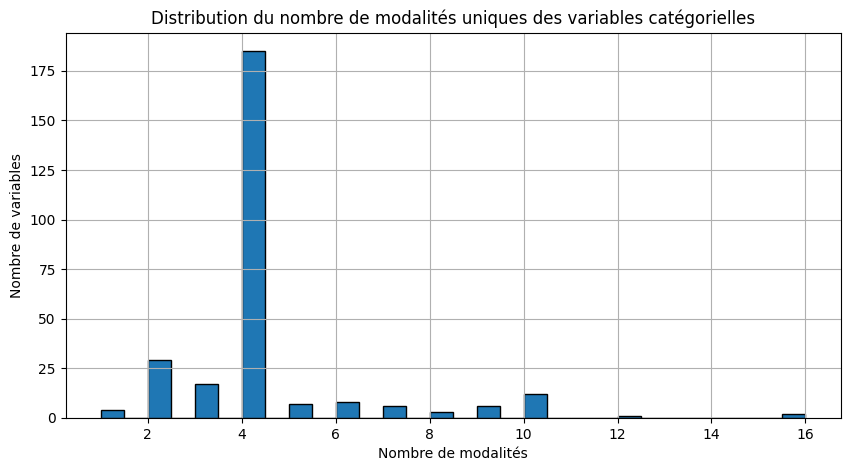

In [60]:
# Séparation des variables par type
categorical_cols = X_train.select_dtypes(include="object").columns.tolist()
numerical_cols = X_train.select_dtypes(
    include=["float64", "int64"]
).columns.tolist()

n_modalites = [X_train[col].nunique() for col in categorical_cols]
plt.figure(figsize=(10, 5))
plt.hist(n_modalites, bins=30, edgecolor="black")
plt.title(
    "Distribution du nombre de modalités uniques des variables catégorielles"
)
plt.xlabel("Nombre de modalités")
plt.ylabel("Nombre de variables")
plt.grid(True)
plt.show()

L’histogramme de la cardinalité des variables catégorielles ci-dessus offre une perspective globale sur leur distribution, et permet d’identifier :

- la proportion de variables peu variées ($\leq$ 5 modalités), généralement simples à encoder ;
- l’existence éventuelle de variables à cardinalité élevée, nécessitant des traitements spécifiques.

Cependant, cette représentation ne fournit **aucune information sur l’identité des variables concernées**, ce qui **limite son usage opérationnel**. Il est donc **impossible de cibler des variables précises** à partir de ce graphique.

En conséquence, l’histogramme peut être conservé à titre **illustratif**, mais ne remplace pas une synthèse structurée par variable, qui seule permet de prendre des décisions de prétraitement (encodage, regroupement, exclusion).

Affichons donc le résumé synthétique des variables catégorielles.

In [ ]:
# Résumé synthétique des variables catégorielles
summary = []

for col in categorical_cols:
    vc = X_train[col].value_counts(dropna=False)
    top_value = vc.index[0]
    top_freq = vc.iloc[0]
    top_prop = round(top_freq / len(X_train) * 100, 2)
    summary.append(
        {
            "Variable": col,
            "Modalités uniques": X_train[col].nunique(dropna=False),
            "Modalité la plus fréquente": top_value,
            "Fréquence (%)": top_prop,
        }
    )

cat_summary_df = pd.DataFrame(summary).sort_values(
    by="Fréquence (%)", ascending=False
)
# Affichage dans une boîte scrollable
html_summary = cat_summary_df.to_html(index=False)
HTML(
    f"""
    <div style="height:300px; overflow-y:scroll;
                border:1px solid lightgray; padding:10px">
        {html_summary}
    </div>
    """
)

Effectuons une démarche analogue à celle réalisée précédemment pour les variables numériques.

In [ ]:
# Résumé synthétique des variables numériques
summary = []

for col in numerical_cols:
    vc = X_train[col].value_counts(dropna=False)
    top_value = vc.index[0]
    top_freq = vc.iloc[0]
    top_prop = round(top_freq / len(X_train) * 100, 2)
    summary.append(
        {
            "Variable": col,
            "Modalités uniques": X_train[col].nunique(dropna=False),
            "Modalité la plus fréquente": top_value,
            "Fréquence (%)": top_prop,
        }
    )

cat_summary_df = pd.DataFrame(summary).sort_values(
    by="Fréquence (%)", ascending=False
)
# Affichage dans une boîte scrollable
html_summary = cat_summary_df.to_html(index=False)
HTML(
    f"""
    <div style="height:300px; overflow-y:scroll;
                border:1px solid lightgray; padding:10px">
        {html_summary}
    </div>
    """
)

Variable,Modalités uniques,Modalité la plus fréquente,Fréquence (%)
SURFACE20,4,0.0,100.00
DEROG15,2,100.0,99.99
SURFACE14,5,0.0,99.99
SURFACE15,4,0.0,99.99
CA2,3,0.0,99.98
KAPITAL4,2,0.0,99.96
NBBAT3,6,0.0,99.89
KAPITAL2,2,0.0,99.77
NBBAT5,6,0.0,99.73
KAPITAL5,2,0.0,99.58


### Analyse quantitative des variables catégorielles

#### 1. Nombre de modalités
- Il apparaît une **grande hétérogénéité** dans le nombre de modalités :
  - Certaines variables présentent une très forte cardinalité, comme `ANNEE_ASSURANCE` avec 1113 modalités distinctes. Cela peut poser des problèmes en modélisation, notamment pour les algorithmes sensibles à la granularité des données ;
  - À l'inverse, un grand nombre de variables n'ont que **2 à 4 modalités**, comme `ADOSS`, `TYPERS`, `DEROG1`, etc.
- Plus de **150 variables** possèdent **moins de 5 modalités**, ce qui les rend **faciles à encoder** (binaire, label encoding...).
- Une large famille de variables telles que les `DISTANCE_xxx`, `RR_xxx`, `NBJ_xxx`, `FXI_xxx`, `TMM/TX/TN_xxx` ont souvent **4 classes ordinales** correspondant à des intervalles de valeurs (souvent par quartiles).

#### 2. Distribution déséquilibrée
- Beaucoup de variables présentent une **forte domination d'une modalité** :
  - Exemple : `DEROG1` → 99.98% de "N", 0.02% de "O".
  - `KAPITAL38` → 99.96% de "N".
- D'autres variables comme `ACTIVIT2`, `VOCATION`, `CARACT4`, `MEN_1IND` sont déséquilibrées mais exploitables.

#### 3. Présence de modalités rares
- Certaines modalités apparaissent **moins de 10 fois** :
  - Cela peut poser des problèmes de **sur-apprentissage** et **brouiller le signal** dans les modèles.
  - Exemples : `DEROG14`, `DISTANCE_244`, certaines modalités de `MEN_PROP`.

#### 4. Codages textuels ordonnés
- De nombreuses variables sont issues de **discrétisation d'une variable continue** :
  - Exemples de modalités : `01. <= 10`, `04. >= 40`, etc.
  - Ces variables conservent une **structure ordinale** exploitable :
    - **Encodage ordinal**
    - Ou **reconversion en continu** via la borne médiane

#### 5. Familles de variables cohérentes
- Plusieurs familles homogènes peuvent être identifiées :
  - `DISTANCE_xxx` : distances en classes (4-5 modalités).
  - `NBJxxx_MM/MSOM/MMAX` : séries météo discrétisées.
  - `PROPORTION_xx`, `MEN_xxx`, `KAPITALxx`, `DEROGxx` : codifications internes.
- Ces regroupements permettent une **ingénierie de variables pertinente** :
  - Moyennes ou scores internes
  - Réduction de dimension (ACP)
  - Agrégation par famille

### Implications pour la modélisation

- **Variables peu informatives** ou trop déséquilibrées :
  - À écarter ou traiter spécifiquement.
  - Ex : `DEROG14`, `IND_INC`, `DISTANCE_244` ;

- **Variables ordinales exploitables** :
  - Les variables comme `DISTANCE`, `METEO`, `PROPORTION`, etc., sont **structurées pour un encodage ordonné ou continu** ;

- **Variables très dispersées** :
  - Ex : `ANNEE_ASSURANCE`, `ZONE`
  - Nécessitent un traitement spécifique : **groupement**, **encodage fréquence**, ou **embedding** selon le modèle.

L'approche implémentée ici repose sur une stratégie **différenciée selon la nature et la complétude des variables**, avec les objectifs suivants :

- **Préserver l'information existante** dans les colonnes peu affectées par des valeurs manquantes ;
- **Limiter la distorsion** causée par l'imputation dans les colonnes fortement incomplètes ;
- **Permettre au modèle d'apprendre** à partir du fait qu'une valeur était absente, en créant une modalité explicite (`'missing'`) pour les variables catégorielles très incomplètes ;

#### Logique appliquée :
- **Variables numériques :**
  - Si moins de 30% de valeurs manquantes → imputation par la **médiane** (robuste aux outliers) ;
  - Si plus de 30% de valeurs manquantes → imputation conservatrice par **zéro**, considérée comme une absence de valeur pertinente.

- **Variables catégorielles :**
  - Si moins de 30% de valeurs manquantes → imputation par la **valeur la plus fréquente** (mode);
  - Si plus de 30% de valeurs manquantes → imputation par une valeur explicite `'missing'`, interprétable comme une modalité à part entière.

Cette stratégie permet une **modélisation plus robuste**, tout en **évitant de supprimer prématurément des variables potentiellement informatives** malgré leur incomplétude.



In [ ]:
print("ID" in X_train.columns.tolist())

In [ ]:
# Séparation colonnes numériques / catégorielles
num_cols = X_train.select_dtypes(include=["number"]).columns
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns

# 1. Colonnes numériques
# a. Colonnes avec peu de valeurs manquantes (<30%) → imputation par la médiane
low_na_num = [col for col in num_cols if X_train[col].isna().mean() < 0.3]
# b. Colonnes très incomplètes (>=30%) → imputation conservatrice par constante
high_na_num = [col for col in num_cols if X_train[col].isna().mean() >= 0.3]

X_train[low_na_num] = SimpleImputer(strategy="median").fit_transform(
    X_train[low_na_num]
)
X_train[high_na_num] = X_train[high_na_num].fillna(0)

# 2. Colonnes catégorielles
# a. Colonnes avec peu de NaN → imputation par la valeur la plus fréquente
low_na_cat = [col for col in cat_cols if X_train[col].isna().mean() < 0.3]
# b. Colonnes très incomplètes → imputation par 'missing' (valeur explicite)
high_na_cat = [col for col in cat_cols if X_train[col].isna().mean() >= 0.3]

X_train[low_na_cat] = SimpleImputer(strategy="most_frequent").fit_transform(
    X_train[low_na_cat]
)
X_train[high_na_cat] = X_train[high_na_cat].fillna("missing")

Avant d'entraîner un modèle, il est essentiel d'écarter certaines variables qui **n'apportent pas d'information pertinente pour la prédiction**, ou qui pourraient **introduire du bruit ou des fuites de données** :

- **`ID`** :  
  - Identifiant unique de la ligne ou de l'observation ;
  - **Sans signification statistique** : il n'est pas corrélé à la cible et risque d'être utilisé à tort par un modèle non régularisé comme un pseudo-prédicteur.
  - Peut **induire du surapprentissage** si laissé dans les données.

- **`ANNEE_ASSURANCE`** :  
  - Variable qui peut être fortement **corrélée avec la date de déclaration**, de souscription ou avec le risque (biais temporel).
  - Si la modélisation est censée être **générique et prédictive hors période**, cette colonne introduit un **risque de fuite temporelle**.
  - À moins de construire un modèle par période ou de vouloir capter des effets saisonniers ou historiques, il est préférable de la supprimer.

> Ces suppressions participent à la **robustesse** du modèle en limitant l'apprentissage sur des artefacts sans valeur prédictive réelle.

In [ ]:
# Suppression des colonnes inutiles
X_train = X_train.drop(["ID", "ANNEE_ASSURANCE"], axis=1)

# Encodage des variables catégoriques avec CountEncoder
encoder = CountEncoder(cols=cat_cols)
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)

### Graphe de distribution de la variable cible `CM` (coût moyen)

Le graphe de distribution de la variable cible s'inscrit dans trois objectifs :
- Détection de la distribution (loi normale, asymétrique, etc.) : Si la distribution est fortement asymétrique , cela peut indiquer qu'une transformation sera nécessaire pour améliorer les performances du modèle ;
- Identification d'éventuelles valeurs extrêmes (*outliers*) : Les éléments isolés à l'extrémité du graphique révèlent des valeurs atypiques, qui peuvent biaiser l'apprentissage si non traitées ;
- Ajustement du modèle et du choix de la métrique : Une distribution très déséquilibrée ou avec des zéros majoritaires peut influencer le choix de la fonction de perte ou des stratégies de rééchantillonnage.


In [ ]:
# Graphe de distribution de y_train['CM']

plt.figure(figsize=(10, 6))
sns.histplot(y_train["CM"], kde=True)
plt.title("Distribution of CM")
plt.xlabel("CM")
plt.ylabel("Frequency")
plt.show()

La distribution du coût moyen (CM) présente les caractéristiques suivantes :

- Distribution extrêmement asymétrique à droite :
  - Une immense majorité des valeurs de CM sont proches de zéro ;
  - Quelques valeurs atteignent des niveaux très élevés (jusqu'à près de 500000), mais elles sont très rares.

- Concentration des observations :
  - Plus de 3 millions d'observations se situent dans l'intervalle 0 à quelques milliers d'euros, ce qui indique une forte concentration autour de petites valeurs ;
  - Cela suggère que la majorité des sinistres ont un coût moyen faible.

- Présence de valeurs extrêmes (outliers) :
  - Quelques sinistres présentent un coût exceptionnellement élevé.
  - Ces valeurs ont un poids potentiel important dans le calcul des métriques(RMSE, MAE…) et peuvent biaisser l'entraînement si non traitées.

L'examen de la distribution brute de `CM` révèle une **forte asymétrie à droite** : la majorité des valeurs sont très faibles (proches de zéro), tandis qu'une minorité présente des montants exceptionnellement élevés.

Ce comportement est typique des variables de type **coût de sinistres** ou **montants financiers**, souvent modélisées avec des **lois de Pareto**, **log-normales** ou **gamma**.

Une transformation logarithmique `log(CM + 1)` permettrait de :
  - Réduire l'effet des *outliers* ;
  - Rapprocher la distribution d'une loi normale, facilitant la modélisation ;
  - Améliorer la performance des modèles sensibles à la distribution.

In [ ]:
# Transformation log(CM + 1) pour réduire la variance et la dissymétrie
y_train["CM_log"] = np.log1p(y_train["CM"])  # log1p(x) = log(x + 1)

plt.figure(figsize=(10, 6))
sns.histplot(y_train["CM_log"], kde=True, bins=50)
plt.title("Distribution de log(CM + 1)")
plt.xlabel("log(CM + 1)")
plt.ylabel("Fréquence")
plt.show()

Même après transformation `log(CM + 1)`, la distribution reste ultra-concentrée autour de zéro, ce qui n'est pas l'effet attendu d'un `log-transform`. Cela suggère fortement que **la majorité des valeurs de CM sont nulles ou quasi-nulles**.
Vérifions cette hypothèse en deux temps :
1. Vérifier la proportion de zéros

In [ ]:
zero_ratio = (y_train["CM"] == 0).mean()
print(f"Proportion de zéros dans CM : {zero_ratio:.2%}")

2. Affiche la distribution sans les zéros

In [ ]:
non_zero_cm = y_train[y_train["CM"] > 0]["CM"]
log_non_zero_cm = np.log1p(non_zero_cm)

plt.figure(figsize=(10, 6))
sns.histplot(log_non_zero_cm, kde=True, bins=50)
plt.title("Distribution de log(CM + 1) pour CM > 0")
plt.xlabel("log(CM + 1)")
plt.ylabel("Fréquence")
plt.show()

Plusieur éléments se dégagent de la transformation logarithmique sur les observations strictement positives (`CM > 0`) :

1. **Réduction de l'asymétrie**  
   La transformation logarithmique a permis de corriger l'asymétrie extrême initialement observée dans la distribution brute de `CM`. Elle :
   - compresse l'effet des très grandes valeurs (*outliers*),
   - met mieux en évidence la structure sous-jacente des montants courants.

2. **Distribution toujours asymétrique à droite**  
   Malgré la transformation, la distribution reste légèrement étalée vers la droite, ce qui reflète la nature typiquement déséquilibrée des montants de sinistres (une majorité de petits montants, quelques très gros).

3. Le mode, qui constitue la valeur la plus fréquente dans une série de données, se situe autour de `log(CM + 1) ≈ 6`: Cela correspond à un coût de sinistre typique de `exp(6) - 1 ≈ 400 €`, valeur qui semble représenter un sinistre "standard" dans le jeu de données.

Nous pouvons en déduire que cette transformation rend la variable cible plus adaptée à une régression, notamment linéaire, en :
  - réduisant la variance,
  - limitant le poids des valeurs extrêmes,
  - facilitant la convergence des modèles.

- Elle améliore également la **robustesse** des algorithmes face aux déséquilibres structurels inhérents aux données assurantielles.

> Cette transformation est particulièrement utile dans une stratégie en deux étapes :  
> 1. modèle binaire de prédiction de la survenue d'un sinistre (`CM > 0`),  
> 2. régression sur `log(CM + 1)` conditionnée à `CM > 0`.

In [ ]:
# 1. Création de la cible binaire (sinistre ou non)
y_train_bin = (y_train["CM"] > 0).astype(int)

# Séparation des données pour la phase de test
X_tr, X_val, y_bin_tr, y_bin_val = train_test_split(
    X_train_enc, y_train_bin, test_size=0.2, random_state=42
)

# 2. Étape 1 - Modèle de classification binaire : prédire si CM > 0
clf = LogisticRegression(max_iter=1000)
clf.fit(X_tr, y_bin_tr)

# Prédictions de probabilité d’avoir un sinistre
proba_sinistre = clf.predict_proba(X_val)[:, 1]

# Évaluation du modèle binaire
auc = roc_auc_score(y_bin_val, proba_sinistre)
print(f"AUC (CM > 0): {auc:.4f}")

# 3. Étape 2 - Modèle de régression conditionnelle sur CM > 0
# Filtrage sur les cas avec sinistre
X_train_pos = X_train_enc[y_train["CM"] > 0]
y_train_logcm = np.log1p(y_train["CM"][y_train["CM"] > 0])

# Séparation pour validation
X_tr2, X_val2, y_tr2, y_val2 = train_test_split(
    X_train_pos, y_train_logcm, test_size=0.2, random_state=42
)

# Régression sur log(CM + 1)
reg = Ridge(alpha=1.0)
reg.fit(X_tr2, y_tr2)

# Prédictions
y_pred_log = reg.predict(X_val2)
rmse = mean_squared_error(y_val2, y_pred_log)
print(f"RMSE sur log(CM + 1): {rmse:.4f}")

#### Analyse des performances du modèle

#### 1. AUC (CM > 0) = **0.7371**

L'AUC (*Area Under the Curve*) évalue la capacité du modèle à distinguer les observations où `CM > 0` (existence d'un sinistre) de celles où `CM = 0` (absence de sinistre).  
Une AUC de **0.7371** indique une **bonne performance de discrimination** :  
- Le modèle parvient à capter un signal pertinent.
- Il est significativement meilleur que le hasard (AUC = 0.5).
- Cela ouvre la voie à des **applications utiles pour le scoring ou la priorisation du risque**.

#### 2. RMSE sur `log(CM + 1)` = **5.5240**

Le RMSE est calculé ici sur la transformation logarithmique `log(CM + 1)`, souvent utilisée pour réduire l'impact des outliers dans une distribution très asymétrique.  
Une erreur de 5.5240 en log se traduit par une erreur moyenne d’environ :

$$
e^{5.5240} - 1 \approx 250 \text{ €}
$$

Cela signifie qu'en moyenne, le modèle se trompe d'environ 250 € sur la prédiction du coût sinistre.  
C'est une erreur significative si la plupart des sinistres sont faibles, mais raisonnable si la distribution comporte de nombreux sinistres très élevés.

Ainsi :

- Le modèle **discrimine correctement** la survenue d'un sinistre (AUC satisfaisante).
- L'estimation du coût (RMSE) est perfectible, probablement à cause de la **présence d’outliers** importants.
- Des améliorations possibles :
  - Approche **en deux étapes** : classification (CM > 0) + régression sur les cas sinistrés.
  - Utilisation de modèles **robustes aux valeurs extrêmes**.
  - Test de **transformations alternatives** ou pondérations adaptées au domaine assurantiel.
